# 1. 머신러닝 v.s. 딥러닝
머신러닝은 딥러닝과 무슨 차이가 있을까요?
만약 한쪽이 다른쪽 보다 더 좋다고 한다면 이유가 뭘까요?

#2. AI로 풀 수 있는 문제 유형


##2-1. 분류 (Classification)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, test_size=.25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X, train_y)
preds = clf.predict(test_X)
accuracy_score(test_y, preds)

0.9473684210526315

##2-2. 군집화 (Clustering)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(train_X)
print(kmeans.cluster_centers_)

[[4.97894737 3.38947368 1.46052632 0.25263158]
 [6.78965517 3.08275862 5.66896552 2.03448276]
 [5.84666667 2.73777778 4.4        1.43555556]]


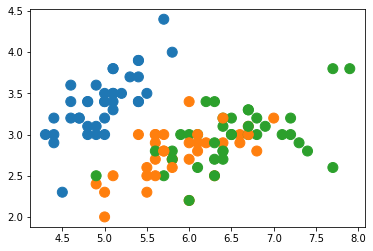

In [ ]:
plt.scatter(train_X[:,0], train_X[:,1], s=100, c=[sns.color_palette()[x] for x in train_y])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


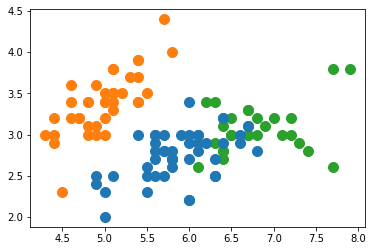

In [ ]:
plt.scatter(train_X[y_kmeans == 0,0], train_X[y_kmeans == 0,1], s=100, c=sns.color_palette()[1])
plt.scatter(train_X[y_kmeans == 1,0], train_X[y_kmeans == 1,1], s=100, c=sns.color_palette()[2])
plt.scatter(train_X[y_kmeans == 2,0], train_X[y_kmeans == 2,1], s=100, c=sns.color_palette()[0])

# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow')

#3. 평가 방법

##3-1. Confusion Matrix

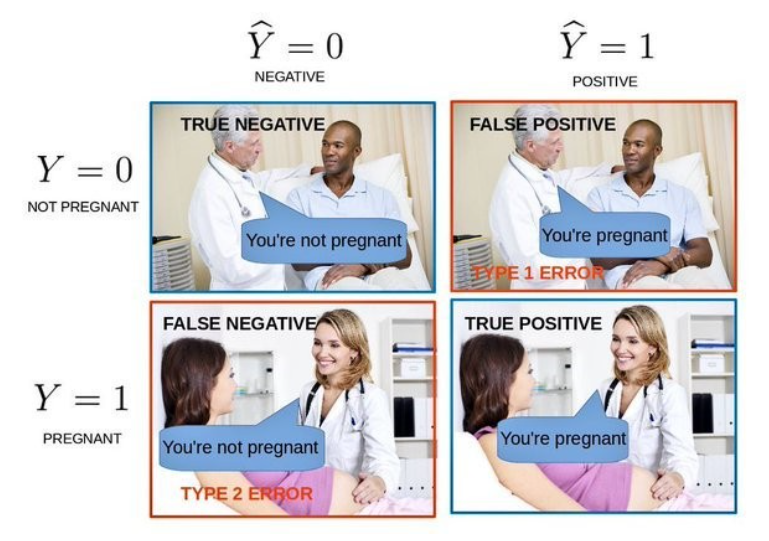

##3-2. Precision, Recall, F-1 Score


정확도 (Accuracy) = 예측 결과과 실제 값이 같은 건수 / 전체 데이터 수 = (TP + TN) / (TP + FP + TN + FN)

정밀도 (Precision) = 참이라고 예측한 것 중 실제 참인 비율 = TP / (TP + FP)

재현율 (Recall) = 실제로 참인 것들 중 모델이 참이라고 한 것 비율 = TP / (TP + FN)

f1 = 정밀도와 재현율의 조화평균


##3-3. ROC Curve

* True Positive Rate = True Positives / (True Positives + False Negatives)
* False Positive Rate = False Positives / (False Positives + True Negatives)

In [ ]:
import pandas as pd
from collections import namedtuple
Sample = namedtuple('Sample', ['label', 'pr'])
sample_list = []

sample_list.append(Sample(1, 0.91))
sample_list.append(Sample(1, 0.81))
sample_list.append(Sample(0, 0.71))
sample_list.append(Sample(1, 0.61))
sample_list.append(Sample(1, 0.55))
sample_list.append(Sample(1, 0.54))
sample_list.append(Sample(0, 0.53))
sample_list.append(Sample(0, 0.52))
sample_list.append(Sample(1, 0.51))
sample_list.append(Sample(0, 0.505))
sample_list.append(Sample(1, 0.41))
sample_list.append(Sample(0, 0.39))
sample_list.append(Sample(1, 0.38))
sample_list.append(Sample(0, 0.37))
sample_list.append(Sample(0, 0.36))
sample_list.append(Sample(0, 0.35))
sample_list.append(Sample(1, 0.34))
sample_list.append(Sample(0, 0.33))
sample_list.append(Sample(1, 0.31))
sample_list.append(Sample(0, 0.11))

df = pd.DataFrame(sample_list, columns=['label', 'pr'])

In [ ]:
df

,label,pr
0,1,0.910
1,1,0.810
2,0,0.710
3,1,0.610
4,1,0.550
5,1,0.540
6,0,0.530
7,0,0.520
8,1,0.510
9,0,0.505


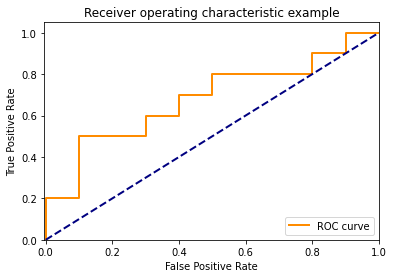

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(df['label'], df['pr'])

plt.figure()
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="ROC curve",
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.005, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()